In [235]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [119]:
trans_df = pd.read_csv("../Data/transactions.csv")
gender_df = pd.read_csv("../Data/customers_gender_train.csv")
mccode_df = pd.read_csv("../Data/tr_mcc_codes.csv", sep=';')
trtype_df = pd.read_csv("../Data/tr_types.csv", sep=';')

# Выброс

In [49]:
trtype_df[140:145]

,tr_type,tr_description
140,2421,Перевод с карты на счет физ.лица в другом тер....
141,2422,Перевод с карты на счет физ.лица в другом тер....
142,999999,XXX
143,2423,Перевод с карты на счет физ.лица в другом тер....
144,2430,Перевод с карты на счет физ.лица в другом банк...


# не декларировано/нет данных? 

In [50]:
trtype_df[82:99]

,tr_type,tr_description
82,8230,Плата за предоставление по запросу клиента док...
83,1310,н/д
84,1410,н/д
85,1510,н/д
86,2325,н/д
87,2360,н/д
88,2440,н/д
89,3300,н/д
90,3810,н/д
91,4035,н/д


In [112]:
gender_df[:5]

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


# MAIN DATA

## Буквы в term_id

In [51]:
trans_df[550:552]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
550,39026145,285 18:29:00,4814,1030,-6737.75,940591
551,39026145,286 00:00:00,5499,1110,-2223.46,J139821


## term_id часто не указан

In [52]:
trans_df[0:5] #1045

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


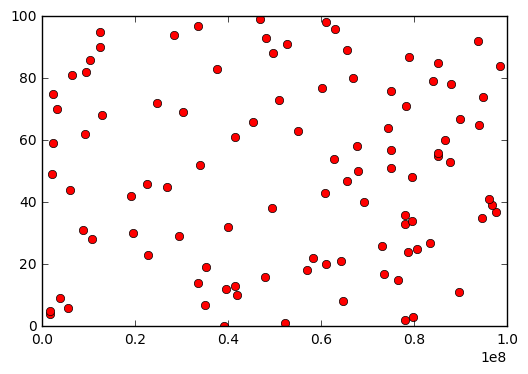

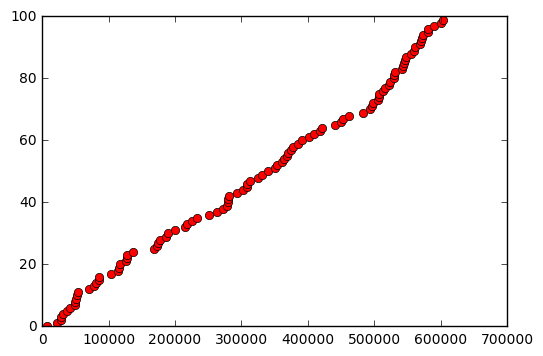

In [76]:
customers = trans_df.customer_id.unique()
#customers.sort()
cust_show_len = 100
plt.plot(customers[:cust_show_len], range(cust_show_len), 'ro')
plt.show()
customers.sort()
plt.plot(customers[:cust_show_len], range(cust_show_len), 'ro')
plt.show()

# Add time feature

In [120]:
zsplt = [(x, y) for x, y in [z.split() for z in trans_df.tr_datetime]]
zspsp = [y.split(':') for x, y in zsplt]
zspsp = [int(zsplt[i][0])*3600*24 + int(zspsp[i][0])*3600 + int(zspsp[i][1])*24 + int(zspsp[i][2]) \
                                                                                        for i in range(len(zsplt))]
trans_df['time'] = zspsp
trans_df[0:5]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,36578
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,122885
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,122936
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,123390
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,227634


# Add days feature

In [221]:
days = pd.Series([int(t.split()[0]) for t in trans_df.tr_datetime])
trans_df['day'] = days
trans_df[:5]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,time,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,36578,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,122885,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,122936,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,123390,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,227634,2


In [374]:
trans_df.to_csv('../Data/pr_trans')

In [222]:
cust_stat = [trans_df[trans_df.customer_id == cust] for cust in customers]

# Transactions
## (change cust_n)

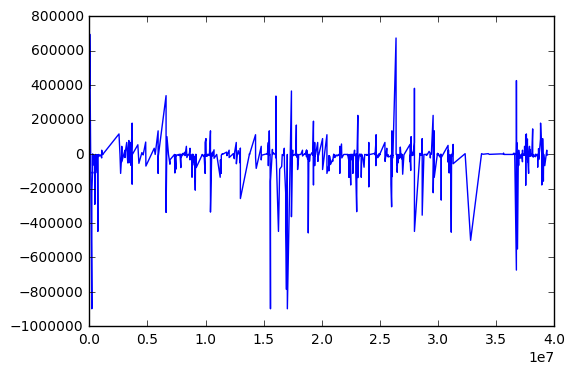

In [263]:
cust_n = 121
plt_y = [float(x) for x in cust_stat[cust_n].amount]
plt_x = cust_stat[cust_n].time
plt.plot(plt_x, plt_y)
plt.show()

# Generate men/women list

In [224]:
men_id = gender_df[gender_df.gender == 1].customer_id
women_id = gender_df[gender_df.gender == 0].customer_id
men = [trans_df[trans_df.customer_id == cust] for cust in men_id]
women = [trans_df[trans_df.customer_id == cust] for cust in women_id]

In [225]:
men_av_amounts = [sum(man.amount) / len(man.amount) for man in men]
women_av_amounts = [sum(woman.amount) / len(woman.amount) for woman in women]
men_av_abs_amounts = [sum(map(abs, man.amount)) / len(man.amount) for man in men]
women_av_abs_amounts = [sum(map(abs, woman.amount)) / len(woman.amount) for woman in women]

# Aavarage transaction

In [226]:
men_av_amount = sum(men_av_amounts) / len(men_av_amounts)
women_av_amount = sum(women_av_amounts)/len(women_av_amounts)
men_av_abs_amount = sum(men_av_abs_amounts)/len(men_av_abs_amounts)
women_av_abs_amount = sum(women_av_abs_amounts)/len(women_av_abs_amounts)
print('men')
print('av_tr:', men_av_amount, ' abs:', men_av_abs_amount)

print('women')
print('av_tr:', women_av_amount, ' abs:', women_av_abs_amount)

men
av_tr: -39141.2549809  abs: 98511.5644556
women
av_tr: -27552.7411136  abs: 69311.0884197


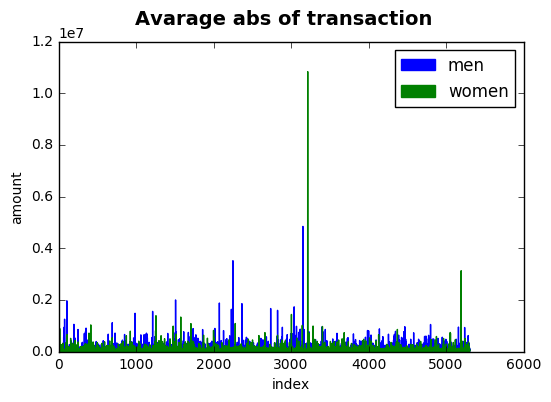

In [279]:
indexes = range(min(len(men), len(women)))

plt.suptitle('Avarage abs of transaction', fontsize=14, fontweight='bold')
man_patch = mpatches.Patch(color='blue', label='men')
woman_patch = mpatches.Patch(color='green', label='women')
plt.legend(handles=[man_patch, woman_patch])
plt.xlabel('index')
plt.ylabel('amount')

plt.plot(indexes, men_av_abs_amounts[:len(indexes)])
plt.plot(indexes, women_av_abs_amounts[:len(indexes)])
plt.savefig('avarage_amount_abs.png')
plt.show()

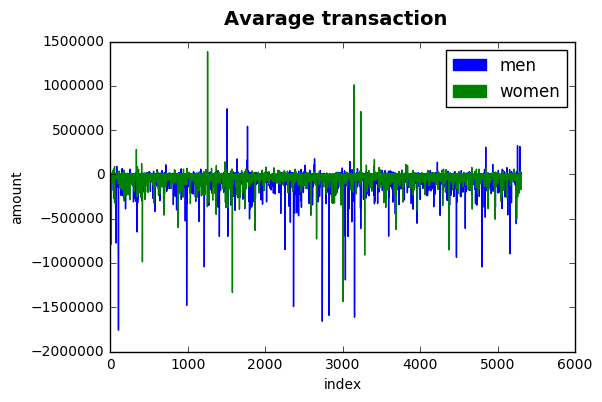

In [228]:
plt.suptitle('Avarage transaction', fontsize=14, fontweight='bold')
man_patch = mpatches.Patch(color='blue', label='men')
woman_patch = mpatches.Patch(color='green', label='women')
plt.legend(handles=[man_patch, woman_patch])
plt.xlabel('index')
plt.ylabel('amount')

indexes = range(min(len(men), len(women)))
plt.plot(indexes, men_av_amounts[:len(indexes)])
plt.plot(indexes, women_av_amounts[:len(indexes)])
plt.savefig('avarage_amount.png')
plt.show()

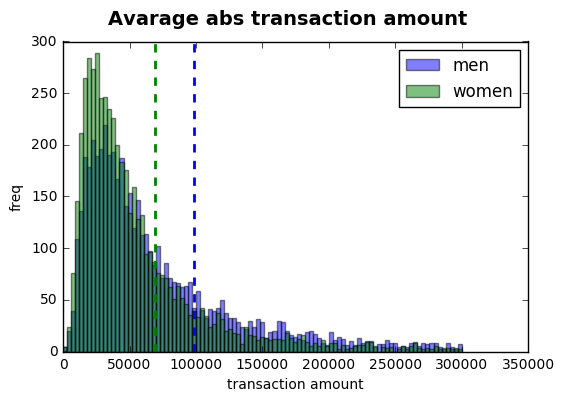

In [372]:
bins = np.linspace(0, 0.03e7, 100)
indexes = range(min(len(men), len(women)))
plt.suptitle('Avarage abs transaction amount', fontsize=14, fontweight='bold')
plt.hist(men_av_abs_amounts[:len(indexes)], bins, alpha=0.5, label='men')
plt.axvline(np.array(men_av_abs_amounts[:len(indexes)]).mean(), color='b', linestyle='dashed', linewidth=2)
plt.hist(women_av_abs_amounts[:len(indexes)], bins, alpha=0.5, label='women')
plt.axvline(np.array(women_av_abs_amounts[:len(indexes)]).mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('transaction amount')
plt.ylabel('freq')

plt.savefig('amount_abs_hist.png')
plt.show()

In [232]:
days = trans_df.day.unique()
days.sort()
men_tr_num_per_days = [sum([len(man[man.day == d]) for man in men]) for d in days]
women_tr_num_per_days = [sum([len(woman[woman.day == d]) for woman in women]) for d in days]

In [259]:
men_tr_num_per_wd = [0] * 7
for i in range(len(men_tr_num_per_days)):
    men_tr_num_per_wd[i % 7] += men_tr_num_per_days[i]
women_tr_num_per_wd = [0] * 7
for i in range(len(women_tr_num_per_days)):
    women_tr_num_per_wd[i % 7] += women_tr_num_per_days[i]

men_tr_num_per_month = [0] * 30
for i in range(len(men_tr_num_per_days)):
    men_tr_num_per_month[i % 30] += men_tr_num_per_days[i]
women_tr_num_per_month = [0] * 30
for i in range(len(women_tr_num_per_days)):
    women_tr_num_per_month[i % 30] += women_tr_num_per_days[i]

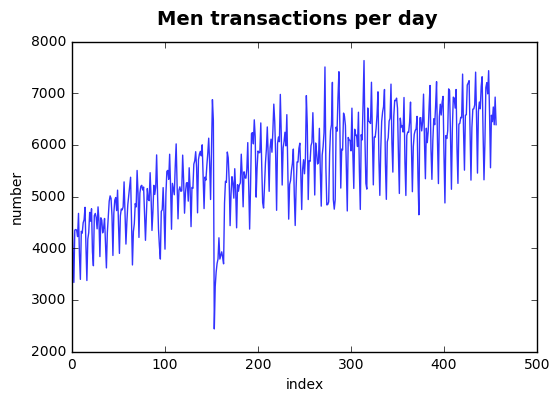

In [373]:
plt.suptitle('Men transactions per day', fontsize=14, fontweight='bold')
plt.xlabel('index')
plt.ylabel('number')
plt.plot(days, men_tr_num_per_days, alpha=0.8)
plt.savefig('men_transactions_per_day.png')
plt.show()

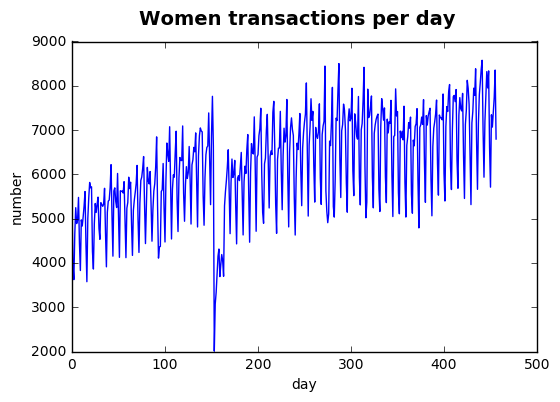

In [365]:
plt.suptitle('Women transactions per day', fontsize=14, fontweight='bold')
plt.xlabel('day')
plt.ylabel('number')
plt.plot(days, women_tr_num_per_days)
plt.savefig('women_transactions_per_day.png')
plt.show()

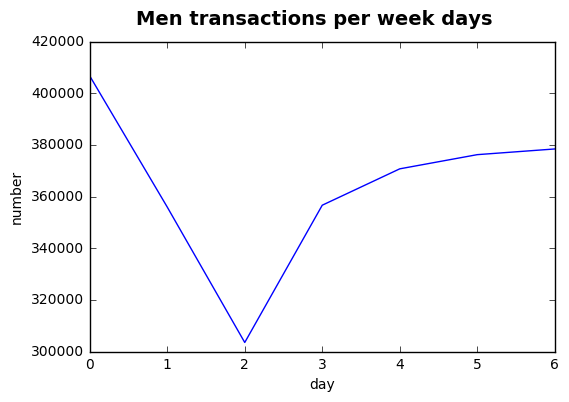

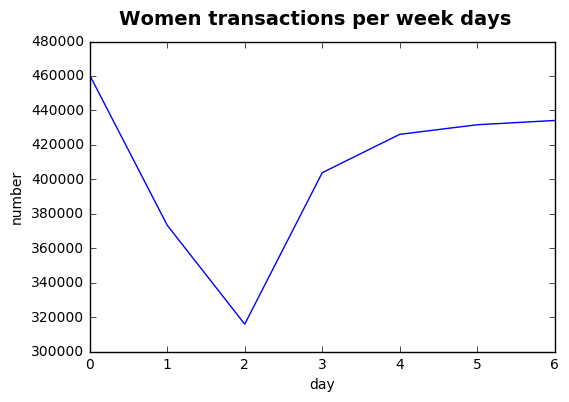

In [292]:
plt.suptitle('Men transactions per week days', fontsize=14, fontweight='bold')
plt.xlabel('day')
plt.ylabel('number')
indexes = range(7)

plt.plot(indexes, men_tr_num_per_wd[:len(indexes)])
plt.savefig('men_transactions_per_wd.png')
plt.show()

plt.suptitle('Women transactions per week days', fontsize=14, fontweight='bold')
plt.xlabel('day')
plt.ylabel('number')
indexes = range(7)
plt.plot(indexes, women_tr_num_per_wd[:len(indexes)])
plt.savefig('women_transactions_per_wd.png')
plt.show()

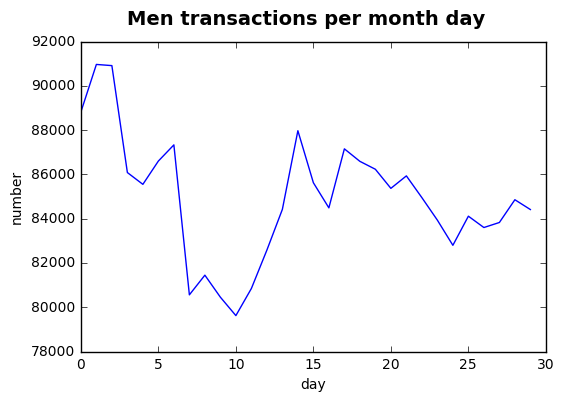

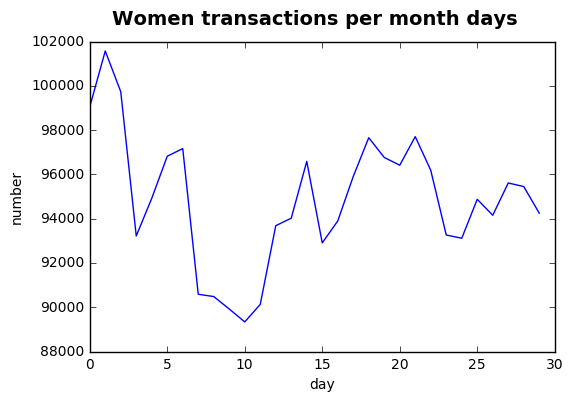

In [265]:
plt.suptitle('Men transactions per month day', fontsize=14, fontweight='bold')
plt.xlabel('day')
plt.ylabel('number')
indexes = range(30)
plt.plot(indexes, men_tr_num_per_month[:len(indexes)])
plt.savefig('men_transactions_per_month.png')
plt.show()

plt.suptitle('Women transactions per month days', fontsize=14, fontweight='bold')
plt.xlabel('day')
plt.ylabel('number')
indexes = range(30)
plt.plot(indexes, women_tr_num_per_month[:len(indexes)])
plt.savefig('women_transactions_per_month.png')
plt.show()